<a href="https://colab.research.google.com/github/SamuelLucas-007/Grupo5OncoAI/blob/main/Tratamento_df_PesoEAltura_SPRINT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tratamento do dataframe *PesoEAltura* antes do merge com os outros dataframes

#1.1 - Configurações iniciais
Montando o drive com o banco de dados e importando as bibliotecas necessárias à manipulação do banco de dados:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd #para ler, visualizar e printar infos do df
import plotly.express as px
import matplotlib.pyplot as plt #para construir e customizar gráficos
import seaborn as sns #para visualizar uns gráficos
import numpy as np 
import datetime
import sklearn

Para fazer a exploração e o pré-processamento dos dados e necessário fazer o upload do .csv

In [ ]:
df3 = pd.read_csv('/content/drive/Shareddrives/OncoAI/Grupo 5 - OncoAI/Projeto/Base_de_dados/BDIPMamaV11-INTELIPesoEAltura_DATA_LABELS_2023-01-24_1926.csv')

In [ ]:
df3.head()

,Record ID,Repeat Instrument,Repeat Instance,Data:,Peso,Altura (em centimetros),IMC
0,302,NaN,NaN,NaN,NaN,NaN,NaN
1,302,Dados Antropometricos,1.0,2009-03-06,58.0,NaN,inf
2,302,Dados Antropometricos,2.0,2009-01-23,57.0,158.0,22.8
3,302,Dados Antropometricos,3.0,2009-02-06,57.0,158.0,22.8
4,302,Dados Antropometricos,4.0,2009-12-25,62.0,158.0,24.8


# 1.2 Exploração dos dados, análise descritiva e identificação de númericas e categóricas

In [ ]:
df3 = df3.rename(columns={df3.columns[3]: 'data_entrada'})

In [ ]:
record_id = df3['Record ID']
repeat_instrument = df3['Repeat Instrument']
repeat_instance = df3['Repeat Instance']
peso = df3['Peso']
data = df3['data_entrada']
altura_cm = df3['Altura (em centimetros)']
imc = df3['IMC']

In [ ]:
df3['data_entrada'] = pd.to_datetime(df3['data_entrada'])

In [ ]:
numeric_cols = df3.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['Record ID', 'Repeat Instance', 'Peso', 'Altura (em centimetros)', 'IMC']

In [ ]:
categorical_cols = df3.select_dtypes(include='object').columns.tolist()
categorical_cols

['Repeat Instrument']

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55654 entries, 0 to 55653
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Record ID                55654 non-null  int64         
 1   Repeat Instrument        51382 non-null  object        
 2   Repeat Instance          51382 non-null  float64       
 3   data_entrada             51354 non-null  datetime64[ns]
 4   Peso                     45178 non-null  float64       
 5   Altura (em centimetros)  49928 non-null  float64       
 6   IMC                      51334 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.0+ MB


<AxesSubplot:xlabel='Altura (em centimetros)'>

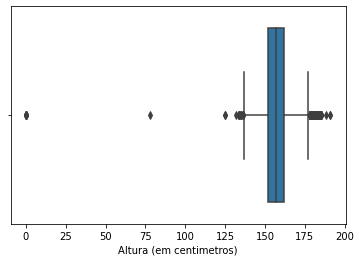

In [ ]:
sns.boxplot(data=df3, x="Altura (em centimetros)")

<AxesSubplot:xlabel='Peso'>

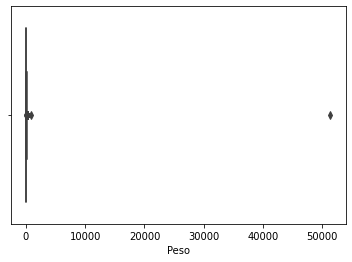

In [ ]:
sns.boxplot(data=df3, x="Peso")

In [ ]:
print(record_id.describe(), '\n')
print(repeat_instrument.describe(), '\n')
print(repeat_instance.describe(), '\n')
print(peso.describe(), '\n')
print(data.describe(), '\n')
print(altura_cm.describe(), '\n')
print(imc.describe(), '\n')

count    55654.000000
mean     45533.983505
std      22306.212680
min        302.000000
25%      24532.000000
50%      50868.000000
75%      63162.000000
max      82240.000000
Name: Record ID, dtype: float64 

count                     51382
unique                        1
top       Dados Antropometricos
freq                      51382
Name: Repeat Instrument, dtype: object 

count    51382.000000
mean        11.498599
std         10.145365
min          1.000000
25%          4.000000
50%          9.000000
75%         16.000000
max         96.000000
Name: Repeat Instance, dtype: float64 

count    45178.000000
mean        71.237403
std        241.738021
min          1.000000
25%         59.650000
50%         68.350000
75%         78.600000
max      51350.000000
Name: Peso, dtype: float64 

count          51354
unique          4622
top       2017-04-11
freq              42
Name: data_entrada, dtype: object 

count    49928.000000
mean       157.195718
std          7.233985
min          0

In [ ]:
df3.corr()

,Record ID,Repeat Instance,Peso,Altura (em centimetros),IMC
Record ID,1.000000,-0.170605,-0.001074,0.027265,-0.062292
Repeat Instance,-0.170605,1.000000,0.007953,0.054999,0.010993
Peso,-0.001074,0.007953,1.000000,0.354118,0.910046
Altura (em centimetros),0.027265,0.054999,0.354118,1.000000,-0.028824
IMC,-0.062292,0.010993,0.910046,-0.028824,1.000000


# 1.3 Pré-processamento dos dados

### Deletando linhas nulas

In [ ]:
# Deletando a partir do método onde verifica se o valor em 'Repeat Instance' é NaN
df3 = df3.dropna(subset=['Repeat Instance'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51382 entries, 1 to 55653
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Record ID                51382 non-null  int64         
 1   Repeat Instrument        51382 non-null  object        
 2   Repeat Instance          51382 non-null  float64       
 3   data_entrada             51354 non-null  datetime64[ns]
 4   Peso                     45178 non-null  float64       
 5   Altura (em centimetros)  49928 non-null  float64       
 6   IMC                      51334 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.1+ MB


### Preenchimento de colunas com missing dados e padronizando

In [ ]:
df3[df3['Record ID'] == 70819]

,Record ID,Repeat Instrument,Repeat Instance,data_entrada,Peso,Altura (em centimetros),IMC
47493,70819,Dados Antropometricos,1.0,2022-02-07,43.50,154.0,18.3
47494,70819,Dados Antropometricos,2.0,2017-07-28,53.50,154.5,22.4
47495,70819,Dados Antropometricos,4.0,2017-08-25,51.20,154.0,21.6
47496,70819,Dados Antropometricos,6.0,2017-09-22,52.30,154.0,22.1
47497,70819,Dados Antropometricos,7.0,2017-10-13,52.30,154.0,22.1
47498,70819,Dados Antropometricos,9.0,2017-10-27,53.00,154.0,22.3
47499,70819,Dados Antropometricos,10.0,2017-11-24,55.00,154.0,23.2
47500,70819,Dados Antropometricos,22.0,2018-02-02,52.90,154.0,22.3
47501,70819,Dados Antropometricos,27.0,2018-06-01,54.50,154.0,23.0
47502,70819,Dados Antropometricos,33.0,2018-11-23,55.35,154.0,23.3


In [ ]:
# Cria uma series para preencher a altura, através do cálculo da mediana, por 'Record ID '
df3_novo= df3.groupby('Record ID')['Altura (em centimetros)'].median()
df3_novo

Record ID
302      158.0
710      155.0
752      152.0
1367     143.0
1589     167.0
         ...  
82123    153.0
82124    151.0
82131    156.0
82205    174.0
82240    161.0
Name: Altura (em centimetros), Length: 3803, dtype: float64

In [ ]:
# Junta a series ao dataframe como coluna em comum 'Record ID', criando uma coluna nova de altura padronizada
df3 = pd.merge(df3, df3_novo, on='Record ID').drop(['Altura (em centimetros)_x'], axis=1)
df3 = df3.rename(columns={'Altura (em centimetros)_y': 'altura_cm'})
df3.head()

,Record ID,Repeat Instrument,Repeat Instance,data_entrada,Peso,IMC,altura_cm
0,302,Dados Antropometricos,1.0,2009-03-06,58.00,inf,158.0
1,302,Dados Antropometricos,2.0,2009-01-23,57.00,22.8,158.0
2,302,Dados Antropometricos,3.0,2009-02-06,57.00,22.8,158.0
3,302,Dados Antropometricos,4.0,2009-12-25,62.00,24.8,158.0
4,302,Dados Antropometricos,5.0,2011-07-09,57.75,23.1,158.0


In [ ]:
# Preenche as linhas em que a mediana do agrupamento do 'Record ID' era NaN
# Utiliza a mediana geral da coluna 'altura_cm' para preencher os dados nulos restantes
mediana = df3['altura_cm'].median()
for i, row in df3.iterrows():
   if pd.isna(row['altura_cm']):
        df3.at[i, 'altura_cm'] = mediana
df3.head()

,Record ID,Repeat Instrument,Repeat Instance,data_entrada,Peso,IMC,altura_cm
0,302,Dados Antropometricos,1.0,2009-03-06,58.00,inf,158.0
1,302,Dados Antropometricos,2.0,2009-01-23,57.00,22.8,158.0
2,302,Dados Antropometricos,3.0,2009-02-06,57.00,22.8,158.0
3,302,Dados Antropometricos,4.0,2009-12-25,62.00,24.8,158.0
4,302,Dados Antropometricos,5.0,2011-07-09,57.75,23.1,158.0


In [ ]:
df3[df3['Record ID'] == 70819]

,Record ID,Repeat Instrument,Repeat Instance,data_entrada,Peso,IMC,altura_cm
43926,70819,Dados Antropometricos,1.0,2022-02-07,43.50,18.3,154.0
43927,70819,Dados Antropometricos,2.0,2017-07-28,53.50,22.4,154.0
43928,70819,Dados Antropometricos,4.0,2017-08-25,51.20,21.6,154.0
43929,70819,Dados Antropometricos,6.0,2017-09-22,52.30,22.1,154.0
43930,70819,Dados Antropometricos,7.0,2017-10-13,52.30,22.1,154.0
43931,70819,Dados Antropometricos,9.0,2017-10-27,53.00,22.3,154.0
43932,70819,Dados Antropometricos,10.0,2017-11-24,55.00,23.2,154.0
43933,70819,Dados Antropometricos,22.0,2018-02-02,52.90,22.3,154.0
43934,70819,Dados Antropometricos,27.0,2018-06-01,54.50,23.0,154.0
43935,70819,Dados Antropometricos,33.0,2018-11-23,55.35,23.3,154.0


In [ ]:
df3.altura_cm.count()

51382

In [ ]:
# Preenche as datas nulas e organiza em ordem crescente de data as entradas por 'Record ID'
df3['data_entrada'] = df3['data_entrada'].fillna(method='bfill')
df3 = df3.sort_values(by=['Record ID','data_entrada']).reset_index(drop=True)
df3

,Record ID,Repeat Instrument,Repeat Instance,data_entrada,Peso,IMC,altura_cm
0,302,Dados Antropometricos,20.0,2009-01-02,57.80,23.2,158.0
1,302,Dados Antropometricos,2.0,2009-01-23,57.00,22.8,158.0
2,302,Dados Antropometricos,3.0,2009-02-06,57.00,22.8,158.0
3,302,Dados Antropometricos,1.0,2009-03-06,58.00,inf,158.0
4,302,Dados Antropometricos,22.0,2009-04-03,56.00,22.4,158.0
...,...,...,...,...,...,...,...
51377,82205,Dados Antropometricos,3.0,2021-06-09,140.00,47.3,174.0
51378,82205,Dados Antropometricos,5.0,2021-07-12,124.10,41.0,174.0
51379,82205,Dados Antropometricos,1.0,2021-08-24,NaN,0.0,174.0
51380,82240,Dados Antropometricos,1.0,2020-12-08,80.35,31.0,161.0


In [ ]:
# Preenche os valores nulos da coluna 'Peso'
df3['Peso'] = df3['Peso'].fillna(method='bfill')

# Cria uma coluna nova para fazer o cálculo de IMC e apaga a antiga
df3['IMC_2'] = df3['Peso'] / ((df3['altura_cm'] / 100) ** 2).round(1)
df3 = df3.drop(['IMC'], axis=1).rename(columns={'IMC_2': 'IMC'})
df3.head()

,Record ID,Repeat Instrument,Repeat Instance,data_entrada,Peso,altura_cm,IMC
0,302,Dados Antropometricos,20.0,2009-01-02,57.8,158.0,23.12
1,302,Dados Antropometricos,2.0,2009-01-23,57.0,158.0,22.80
2,302,Dados Antropometricos,3.0,2009-02-06,57.0,158.0,22.80
3,302,Dados Antropometricos,1.0,2009-03-06,58.0,158.0,23.20
4,302,Dados Antropometricos,22.0,2009-04-03,56.0,158.0,22.40


In [ ]:
df3.describe()

,Record ID,Repeat Instance,Peso,altura_cm,IMC
count,51382.000000,51382.000000,51382.000000,51382.000000,51382.000000
mean,45274.715542,11.498599,71.185979,157.128608,28.829132
std,22418.345632,10.145365,226.738576,6.849279,94.437083
min,302.000000,1.000000,1.000000,134.000000,0.454545
25%,24133.000000,4.000000,59.800000,152.000000,24.519231
50%,50752.000000,9.000000,68.450000,157.000000,27.782609
75%,63078.000000,16.000000,78.700000,161.500000,31.540000
max,82240.000000,96.000000,51350.000000,184.000000,21395.833333


### Análise dos outliers e remoção

In [ ]:
coeficiete_variacao = np.std(df3)/np.mean(df3)
print(coeficiete_variacao)
print('\n')
print(df3.max())
print('\n')
print(df3.min())

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3613: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



IMC                 3.27572
Peso               3.185127
Record ID          0.495158
Repeat Instance    0.882305
altura_cm           0.04359
data_entrada            NaT
dtype: object


Record ID                            82240
Repeat Instrument    Dados Antropometricos
Repeat Instance                       96.0
data_entrada           2022-03-31 00:00:00
Peso                               51350.0
altura_cm                            184.0
IMC                           21395.833333
dtype: object


Record ID                              302
Repeat Instrument    Dados Antropometricos
Repeat Instance                        1.0
data_entrada           2008-04-21 00:00:00
Peso                                   1.0
altura_cm                            134.0
IMC                               0.454545
dtype: object


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Verificando os pesos anormais

In [ ]:
df3[df3['Peso'] < 30]

,Record ID,Repeat Instrument,Repeat Instance,data_entrada,Peso,altura_cm,IMC
23372,43696,Dados Antropometricos,3.0,2014-06-07,29.8,145.75,14.190476
47508,74299,Dados Antropometricos,6.0,2018-01-24,1.0,147.00,0.454545


In [ ]:
df3[df3['Peso'] > 150]

,Record ID,Repeat Instrument,Repeat Instance,data_entrada,Peso,altura_cm,IMC
4085,12651,Dados Antropometricos,3.0,2010-09-14,879.00,159.0,351.600000
9772,21015,Dados Antropometricos,28.0,2011-10-31,51350.00,155.0,21395.833333
15556,27674,Dados Antropometricos,8.0,2017-01-20,154.40,175.0,49.806452
15557,27674,Dados Antropometricos,13.0,2017-12-08,154.40,175.0,49.806452
16161,28542,Dados Antropometricos,21.0,2013-02-17,152.80,178.0,47.750000
16162,28542,Dados Antropometricos,8.0,2013-02-25,153.00,178.0,47.812500
16163,28542,Dados Antropometricos,14.0,2013-05-17,153.80,178.0,48.062500
16164,28542,Dados Antropometricos,4.0,2013-06-10,152.30,178.0,47.593750
16165,28542,Dados Antropometricos,13.0,2013-06-16,151.00,178.0,47.187500
25683,50752,Dados Antropometricos,18.0,2019-02-22,158.00,143.0,79.000000


Pode-se concluir, com as tabelas abaixo, que os valores 158.00 e 177.20 são valores incorretos no seu grupo, pois a margem de diferença está muito grande em relação aos outros valores.

In [ ]:
df3[df3['Record ID'] == 70534]

,Record ID,Repeat Instrument,Repeat Instance,data_entrada,Peso,altura_cm,IMC
43510,70534,Dados Antropometricos,4.0,2017-06-10,114.45,153.0,49.760870
43511,70534,Dados Antropometricos,8.0,2017-07-04,113.20,153.0,49.217391
43512,70534,Dados Antropometricos,1.0,2017-08-15,114.00,153.0,49.565217
43513,70534,Dados Antropometricos,2.0,2017-09-05,177.20,153.0,77.043478
43514,70534,Dados Antropometricos,5.0,2017-10-24,114.80,153.0,49.913043
43515,70534,Dados Antropometricos,7.0,2018-11-28,117.40,153.0,51.043478
43516,70534,Dados Antropometricos,3.0,2019-06-18,117.60,153.0,51.130435
43517,70534,Dados Antropometricos,6.0,2019-07-02,119.20,153.0,51.826087


In [ ]:
df3[df3['Record ID'] == 50752]

,Record ID,Repeat Instrument,Repeat Instance,data_entrada,Peso,altura_cm,IMC
25671,50752,Dados Antropometricos,1.0,2014-11-08,50.00,143.0,25.000
25672,50752,Dados Antropometricos,17.0,2017-09-03,48.80,143.0,24.400
25673,50752,Dados Antropometricos,2.0,2018-03-25,46.35,143.0,23.175
25674,50752,Dados Antropometricos,4.0,2018-05-07,46.80,143.0,23.400
25675,50752,Dados Antropometricos,16.0,2018-06-11,47.10,143.0,23.550
25676,50752,Dados Antropometricos,19.0,2018-06-30,47.30,143.0,23.650
25677,50752,Dados Antropometricos,23.0,2018-08-13,46.40,143.0,23.200
25678,50752,Dados Antropometricos,3.0,2018-10-07,47.60,143.0,23.800
25679,50752,Dados Antropometricos,5.0,2018-10-28,47.55,143.0,23.775
25680,50752,Dados Antropometricos,7.0,2018-12-10,48.15,143.0,24.075


In [ ]:
print("Antigo shape: ", df3.shape)

Antigo shape:  (51382, 7)


In [ ]:
# Deletando as linhas com outliers
df3.drop(df3[df3['Peso'] > 157].index, inplace=True)
df3.drop(df3[df3['Peso'] < 30].index, inplace=True)

In [ ]:
print("Novo shape: ", df3.shape)

Novo shape:  (51376, 7)


In [ ]:
print(df3.Peso.max())
print(df3.Peso.min())

155.15
31.65


In [ ]:
# Gráfico após a remoção de outliers
df = px.data.tips()
fig = px.box(df3, x="Peso")
fig.show()

Valores acima de 106 não foram apagados pois são praticamente 1/5 do datafram

In [ ]:
df3[df3['Peso'] > 106]

,Record ID,Repeat Instrument,Repeat Instance,data_entrada,Peso,altura_cm,IMC
702,3782,Dados Antropometricos,15.0,2019-12-25,107.00,161.0,41.153846
703,3782,Dados Antropometricos,8.0,2021-01-19,106.50,161.0,40.961538
939,4760,Dados Antropometricos,13.0,2009-01-10,108.00,160.0,41.538462
1213,5716,Dados Antropometricos,21.0,2009-08-21,108.00,174.0,36.000000
4575,14078,Dados Antropometricos,1.0,2010-05-13,111.00,167.0,39.642857
...,...,...,...,...,...,...,...
51321,82097,Dados Antropometricos,2.0,2021-04-19,107.90,159.0,43.160000
51375,82205,Dados Antropometricos,4.0,2021-02-28,135.85,174.0,45.283333
51376,82205,Dados Antropometricos,2.0,2021-04-28,134.50,174.0,44.833333
51377,82205,Dados Antropometricos,3.0,2021-06-09,140.00,174.0,46.666667


In [ ]:
coeficiete_variacao_novo = np.std(df3)/np.mean(df3)
print(coeficiete_variacao_novo)
print('\n')
print(df3.info())

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3613: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



IMC                0.194378
Peso               0.211062
Record ID          0.495157
Repeat Instance    0.882294
altura_cm          0.043588
data_entrada            NaT
dtype: object


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51376 entries, 0 to 51381
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Record ID          51376 non-null  int64         
 1   Repeat Instrument  51376 non-null  object        
 2   Repeat Instance    51376 non-null  float64       
 3   data_entrada       51376 non-null  datetime64[ns]
 4   Peso               51376 non-null  float64       
 5   altura_cm          51376 non-null  float64       
 6   IMC                51376 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.1+ MB
None


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



### Criação de colunas novas com o valor máximo e minimo de peso do paciente 

In [ ]:
df3_peso_max= df3.groupby('Record ID')['Peso'].max()

In [ ]:
df3_peso_min= df3.groupby('Record ID')['Peso'].min()

In [ ]:
# Adicionando as colunas por merge no dataframe
df3 = pd.merge(df3, df3_peso_max, on='Record ID').rename(columns={'Peso_y': 'peso_max', 'Peso_x': 'peso_inicial'})
df3 = pd.merge(df3, df3_peso_min, on='Record ID').rename(columns={'Peso': 'peso_min'})
df3.head()

,Record ID,Repeat Instrument,Repeat Instance,data_entrada,peso_inicial,altura_cm,IMC,peso_max,peso_min
0,302,Dados Antropometricos,20.0,2009-01-02,57.8,158.0,23.12,64.9,56.0
1,302,Dados Antropometricos,2.0,2009-01-23,57.0,158.0,22.80,64.9,56.0
2,302,Dados Antropometricos,3.0,2009-02-06,57.0,158.0,22.80,64.9,56.0
3,302,Dados Antropometricos,1.0,2009-03-06,58.0,158.0,23.20,64.9,56.0
4,302,Dados Antropometricos,22.0,2009-04-03,56.0,158.0,22.40,64.9,56.0


In [ ]:
# Deixando apenas a primeira linha do 'Record ID' com as primeiras informações
df3 = df3.drop_duplicates(subset='Record ID', keep='first').reset_index(drop=True)
df3 = df3.rename(columns={'Record ID': 'record_id'})
df3.head()

,record_id,Repeat Instrument,Repeat Instance,data_entrada,peso_inicial,altura_cm,IMC,peso_max,peso_min
0,302,Dados Antropometricos,20.0,2009-01-02,57.8,158.0,23.120000,64.9,56.0
1,710,Dados Antropometricos,18.0,2008-07-12,61.0,155.0,25.416667,66.0,60.5
2,752,Dados Antropometricos,2.0,2009-12-03,84.0,152.0,36.521739,85.9,81.0
3,1367,Dados Antropometricos,1.0,2010-04-28,57.9,143.0,28.950000,59.0,51.0
4,1589,Dados Antropometricos,12.0,2009-04-03,63.2,167.0,22.571429,67.0,62.0


In [ ]:
df3 = df3.drop(columns=['Repeat Instrument', 'Repeat Instance'])

In [ ]:
# Criando csv com o dataframe atualizado
df3.to_csv('/content/drive/Shareddrives/OncoAI/Grupo 5 - OncoAI/Projeto/Base_de_dados/PesoEAltura_TRATADO.csv', index=False)

# Análise descritiva 

### Analisa a estrutura dos dados após tratamento de missing, identificação de outliers e correção 

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3802 entries, 0 to 3801
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     3802 non-null   int64         
 1   data_entrada  3802 non-null   datetime64[ns]
 2   peso_inicial  3802 non-null   float64       
 3   altura_cm     3802 non-null   float64       
 4   IMC           3802 non-null   float64       
 5   peso_max      3802 non-null   float64       
 6   peso_min      3802 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 208.0 KB


In [ ]:
# Média
print(df3['peso_inicial'].mean() )
print(df3['altura_cm'].mean() )
print(df3['IMC'].mean() )
print(df3['peso_max'].mean() )
print(df3['peso_min'].mean() )


69.74818253550764
156.76417937927405
28.377738514004616
74.74068385060494
64.84138400841661


In [ ]:
df = px.data.tips()
fig = px.histogram(df3, x="peso_inicial", nbins = 125)
fig.show()

In [ ]:
df = px.data.tips()
fig = px.box(df3, x="peso_inicial")
fig.show()

In [ ]:
# Mediana
print(df3['peso_inicial'].median() )
print(df3['altura_cm'].median() )
print(df3['IMC'].median() )
print(df3['peso_max'].median() )
print(df3['peso_min'].median() )

68.0
156.225
27.727272727272727
73.1
63.2


In [ ]:
# Moda
print(df3['peso_inicial'].mode() )
print(df3['altura_cm'].mode() )
print(df3['IMC'].mode() )
print(df3['peso_max'].mode() )
print(df3['peso_min'].mode() )

0    59.0
dtype: float64
0    156.0
dtype: float64
0    26.0
dtype: float64
0    69.0
dtype: float64
0    58.0
dtype: float64


### Medidas de variabilidade

In [ ]:
# Variância
print(df3['peso_inicial'].var() )
print(df3['altura_cm'].var() )
print(df3['IMC'].var() )
print(df3['peso_max'].var() )
print(df3['peso_min'].var() )

212.83637351784276
46.601929147504165
30.66928221699283
240.20017911654523
190.02254821398256


In [ ]:
# Desvio padrão
print(df3['peso_inicial'].std() )
print(df3['altura_cm'].std() )
print(df3['IMC'].std() )
print(df3['peso_max'].std() )
print(df3['peso_min'].std() )

14.588912691418876
6.82656056499202
5.537985393353149
15.49839279140083
13.78486663751168


### Matriz de covariância e correlação

In [ ]:
# Covariância
df3.cov()

,record_id,peso_inicial,altura_cm,IMC,peso_max,peso_min
record_id,4.392415e+08,21039.042161,8593.509046,5217.101111,7692.063343,36766.717236
peso_inicial,2.103904e+04,212.836374,36.084660,72.716236,199.844200,173.888963
altura_cm,8.593509e+03,36.084660,46.601929,-2.533752,38.364976,32.770242
IMC,5.217101e+03,72.716236,-2.533752,30.669282,66.509099,58.138151
peso_max,7.692063e+03,199.844200,38.364976,66.509099,240.200179,165.731285
peso_min,3.676672e+04,173.888963,32.770242,58.138151,165.731285,190.022548


In [ ]:
# Correlação
df3.corr()

,record_id,peso_inicial,altura_cm,IMC,peso_max,peso_min
record_id,1.000000,0.068810,0.060064,0.044950,0.023681,0.127263
peso_inicial,0.068810,1.000000,0.362325,0.900029,0.883857,0.864662
altura_cm,0.060064,0.362325,1.000000,-0.067021,0.362615,0.348237
IMC,0.044950,0.900029,-0.067021,1.000000,0.774895,0.761565
peso_max,0.023681,0.883857,0.362615,0.774895,1.000000,0.775738
peso_min,0.127263,0.864662,0.348237,0.761565,0.775738,1.000000


In [ ]:
# Sumariza
df3.describe()

,record_id,peso_inicial,altura_cm,IMC,peso_max,peso_min
count,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000
mean,49402.190426,69.748183,156.764179,28.377739,74.740684,64.841384
std,20958.088870,14.588913,6.826561,5.537985,15.498393,13.784867
min,302.000000,32.100000,134.000000,15.259259,35.000000,31.650000
25%,30844.000000,59.062500,152.000000,24.466844,64.000000,55.100000
50%,54854.500000,68.000000,156.225000,27.727273,73.100000,63.200000
75%,67805.000000,78.000000,161.000000,31.537775,84.000000,72.575000
max,82240.000000,145.000000,184.000000,60.454545,155.150000,143.850000
